In [1]:
%config Completer.use_jedi = False
import pandas as pd
import numpy as np
import os
import random
from PIL import Image
import copy
import umap
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
#cargo las imagenes en data y sus categorias en labels
data = []
labels = []
folderName = 'malimg_paper_dataset_imgs'
for folder in os.listdir('malimg_paper_dataset_imgs'):
    malwarePath = folderName + "/" + folder
    if (not os.path.isdir(malwarePath)) or (folder == '.ipynb_checkpoints'):
        continue
    for imgName in os.listdir(malwarePath):
        imgPath = malwarePath + "/" + imgName
        if (os.path.isfile(imgPath) == False) or imgName == 'desktop.ini':
            continue
        img = copy.deepcopy(Image.open(imgPath))
        data.append(np.asarray(img.resize((64,64)))) #redimensiono
        labels.append(folder)

In [3]:
#shuffle de data y labels
random.seed = 22
merged = list(zip(data, labels))
random.shuffle(merged)
data = [item[0] for item in merged]
labels = [item[1] for item in merged]

In [4]:
#separo el test, validation y train
quantity = int(len(data) / 10) #porcentaje de imagenes totales

test = data[:quantity]
test_labels = labels[:quantity]
validation = data[quantity:quantity*2]
validation_labels = labels[quantity:quantity*2]
train = data[quantity*2:]
train_labels = labels[quantity*2:]

In [6]:
train[0].shape

(64, 64)

In [7]:
def flattener(data):
    for i in range(len(data)):
        data[i] = data[i].flatten()

In [8]:
flattener(train)
flattener(validation)
flattener(test)

In [9]:
train[0]

array([ 37,  29,  17, ..., 122, 137, 110], dtype=uint8)

In [10]:
train[0].shape

(4096,)

In [11]:
# descargo listas de train, val y test
import pickle
with open('data/test', 'wb') as file:
    pickle.dump(test, file)
with open('data/test_labels', 'wb') as file:
    pickle.dump(test_labels, file)
with open('data/validation', 'wb') as file:
    pickle.dump(validation, file)
with open('data/validation_labels', 'wb') as file:
    pickle.dump(validation_labels, file)
with open('data/train', 'wb') as file:
    pickle.dump(train, file)
with open('data/train_labels', 'wb') as file:
    pickle.dump(train_labels, file)

In [9]:
# cargo listas de train, val y test
import pickle
with open('data/test', 'rb') as file:
    test = pickle.load(file)
with open('data/test_labels', 'rb') as file:
    test_labels = pickle.load(file)
with open('data/validation', 'rb') as file:
    validation = pickle.load(file)
with open('data/validation_labels', 'rb') as file:
    validation_labels = pickle.load(file)
with open('data/train', 'rb') as file:
    train = pickle.load(file)
with open('data/train_labels', 'rb') as file:
    train_labels = pickle.load(file)

In [10]:
scaled_train = StandardScaler().fit_transform(train)

In [17]:
reducer = umap.UMAP(random_state=22, n_components=2)

In [18]:
reducer.fit(scaled_train)
reducer.embedding_

/mnt/882C57D72C57BEBE/Anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


array([[ 8.375997 , 10.982823 ],
       [ 8.825945 , 11.033889 ],
       [ 6.4674864,  9.822825 ],
       ...,
       [-8.596263 ,  9.701756 ],
       [14.079896 , -3.5164175],
       [ 5.513152 , 10.04032  ]], dtype=float32)

In [19]:
embedding = reducer.embedding_

In [20]:
reducer.embedding_.shape

(7473, 2)

In [21]:
sns.set(style='dark', context='notebook', rc={'figure.figsize':(14,10)})

/mnt/882C57D72C57BEBE/Anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Text(0.5, 1.0, 'Reducción de dimensiones con UMAP (cant de vecinos cercanos = 10)')

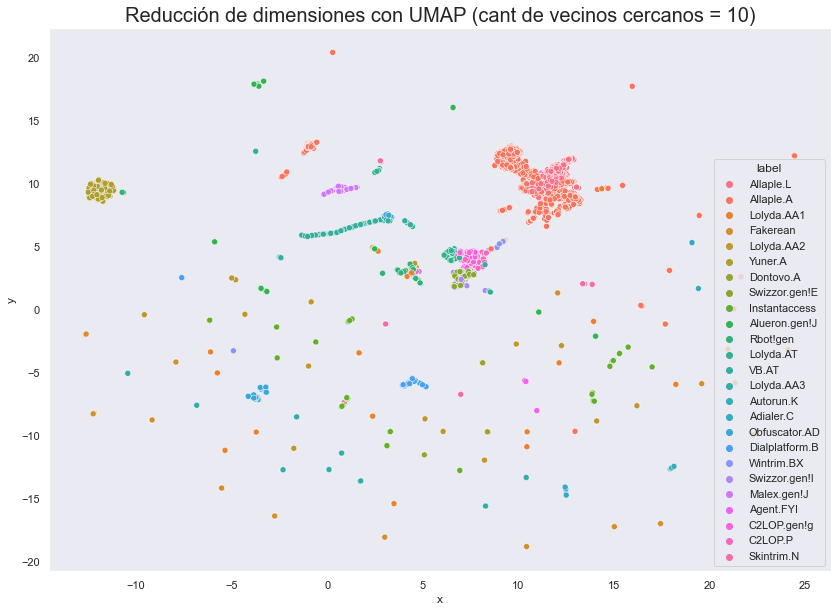

In [24]:
reducer = umap.UMAP(random_state=22, n_components=2, n_neighbors=10)
reducer.fit(scaled_train)
df1 = pd.DataFrame(data={"x" : reducer.embedding_[:, 0], "y" : reducer.embedding_[:, 1], "label":train_labels})
plot = sns.scatterplot(data=df1, x='x',y='y', hue='label')
plot.set_title('Reducción de dimensiones con UMAP (cant de vecinos cercanos = 10)', fontdict={'fontsize':20})

Text(0.5, 1.0, 'Reducción de dimensiones con UMAP (cant de vecinos cercanos = 15)')

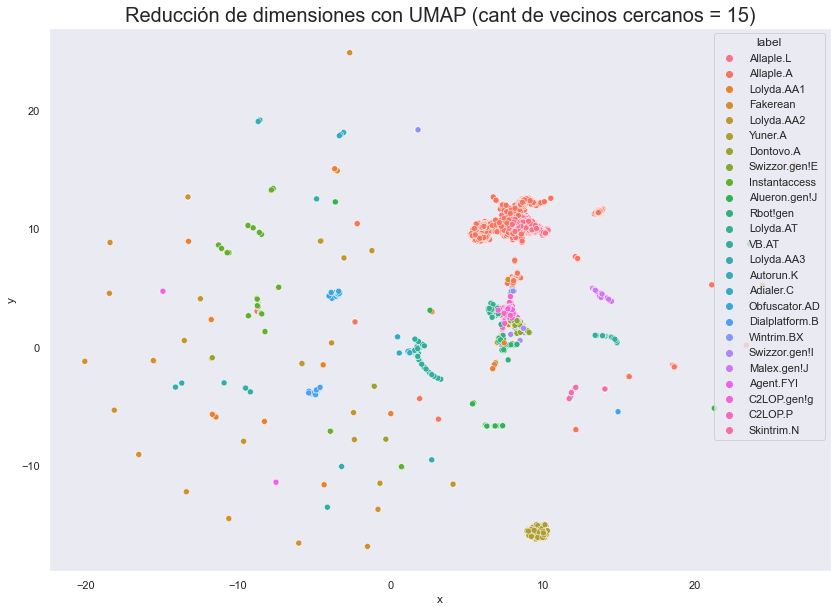

In [23]:
df1 = pd.DataFrame(data={"x" : embedding[:, 0], "y" : embedding[:, 1], "label":train_labels})
plot = sns.scatterplot(data=df1, x='x',y='y', hue='label')
plot.set_title('Reducción de dimensiones con UMAP (cant de vecinos cercanos = 15)', fontdict={'fontsize':20})

/mnt/882C57D72C57BEBE/Anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Text(0.5, 1.0, 'Reducción de dimensiones con UMAP (cant de vecinos cercanos = 20)')

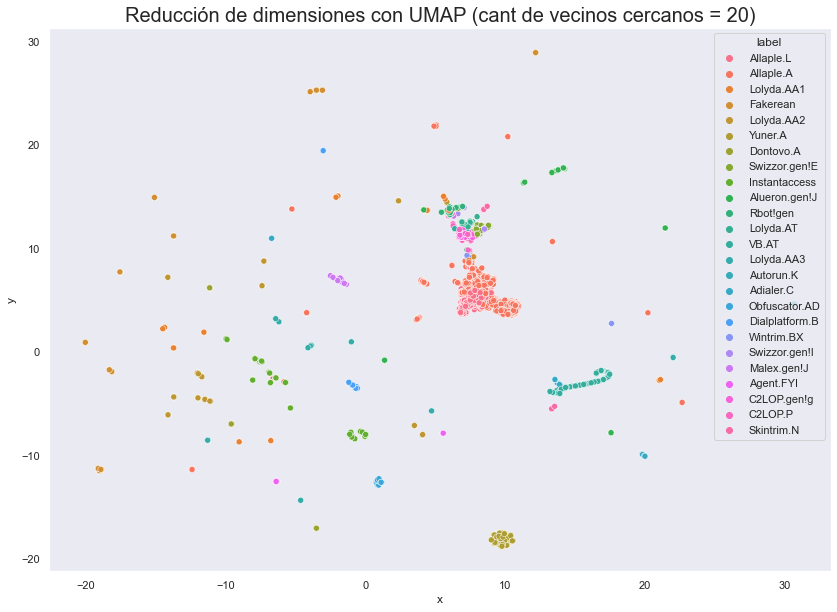

In [26]:
reducer = umap.UMAP(random_state=22, n_components=2, n_neighbors=20)
reducer.fit(scaled_train)
df1 = pd.DataFrame(data={"x" : reducer.embedding_[:, 0], "y" : reducer.embedding_[:, 1], "label":train_labels})
plot = sns.scatterplot(data=df1, x='x',y='y', hue='label')
plot.set_title('Reducción de dimensiones con UMAP (cant de vecinos cercanos = 20)', fontdict={'fontsize':20})

/mnt/882C57D72C57BEBE/Anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Text(0.5, 1.0, 'Reducción de dimensiones con UMAP (cant de vecinos cercanos = 30)')

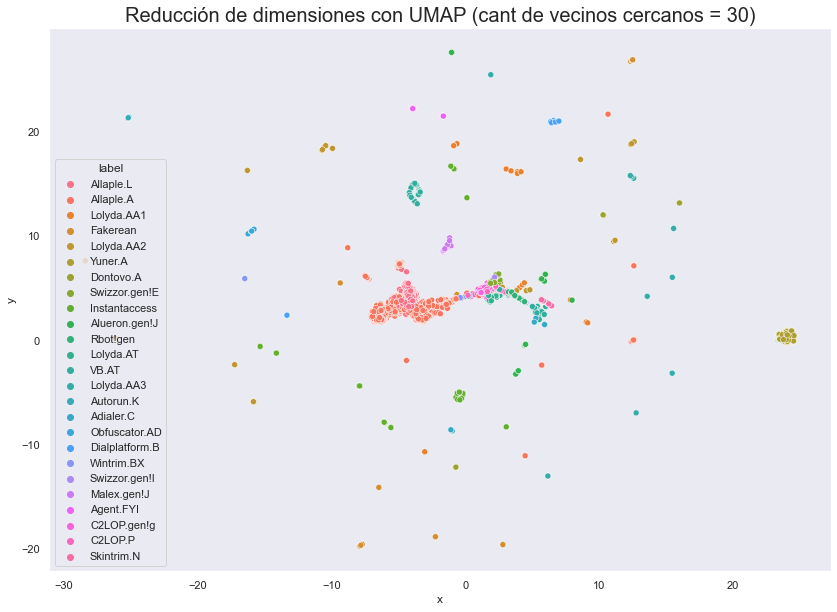

In [29]:
reducer = umap.UMAP(random_state=22, n_components=2, n_neighbors=30)
reducer.fit(scaled_train)
df1 = pd.DataFrame(data={"x" : reducer.embedding_[:, 0], "y" : reducer.embedding_[:, 1], "label":train_labels})
plot = sns.scatterplot(data=df1, x='x',y='y', hue='label')
plot.set_title('Reducción de dimensiones con UMAP (cant de vecinos cercanos = 30)', fontdict={'fontsize':20})

/mnt/882C57D72C57BEBE/Anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Text(0.5, 1.0, 'Reducción de dimensiones con UMAP (cant de vecinos cercanos = 40)')

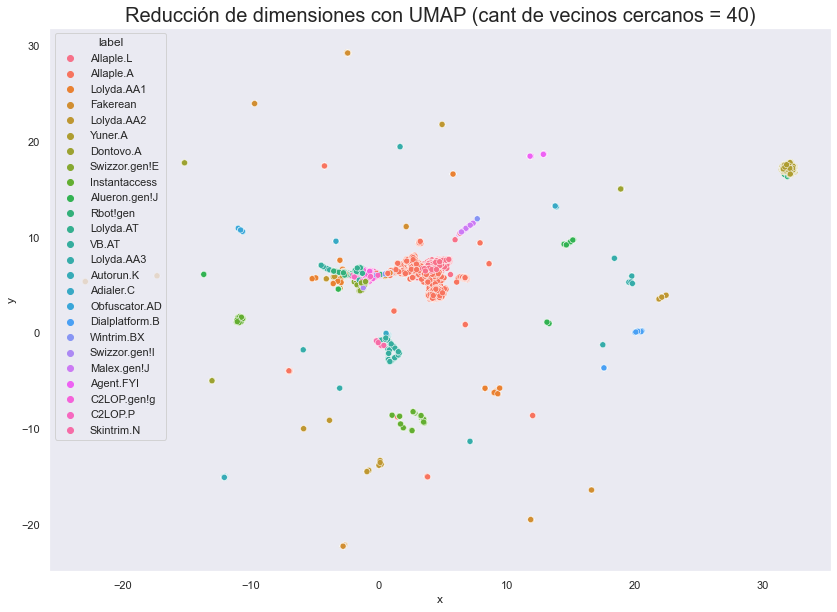

In [25]:
reducer = umap.UMAP(random_state=22, n_components=2, n_neighbors=40)
reducer.fit(scaled_train)
df1 = pd.DataFrame(data={"x" : reducer.embedding_[:, 0], "y" : reducer.embedding_[:, 1], "label":train_labels})
plot = sns.scatterplot(data=df1, x='x',y='y', hue='label')
plot.set_title('Reducción de dimensiones con UMAP (cant de vecinos cercanos = 40)', fontdict={'fontsize':20})

/mnt/882C57D72C57BEBE/Anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Text(0.5, 1.0, 'Reducción de dimensiones con UMAP (cant de vecinos cercanos = 45)')

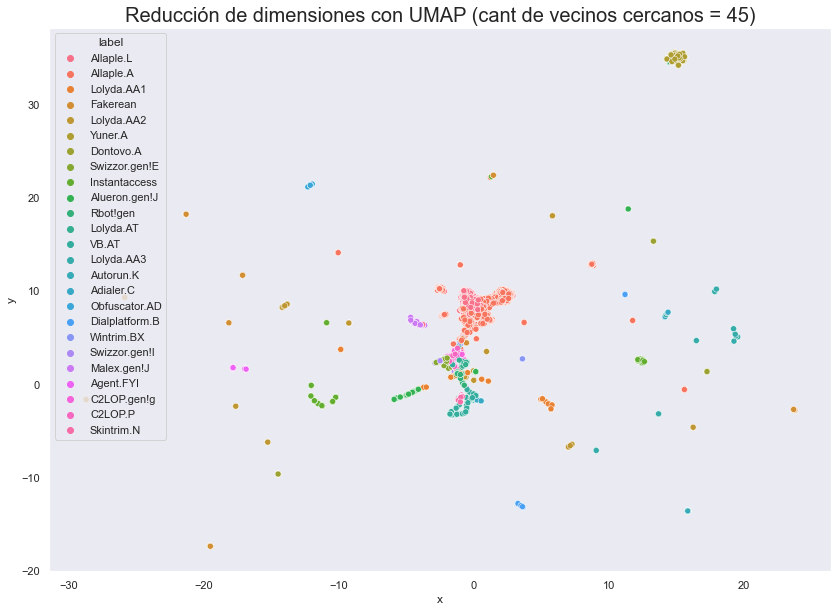

In [28]:
reducer = umap.UMAP(random_state=22, n_components=2, n_neighbors=45)
reducer.fit(scaled_train)
df1 = pd.DataFrame(data={"x" : reducer.embedding_[:, 0], "y" : reducer.embedding_[:, 1], "label":train_labels})
plot = sns.scatterplot(data=df1, x='x',y='y', hue='label')
plot.set_title('Reducción de dimensiones con UMAP (cant de vecinos cercanos = 45)', fontdict={'fontsize':20})

/mnt/882C57D72C57BEBE/Anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Text(0.5, 1.0, 'Reducción de dimensiones con UMAP (cant de vecinos cercanos = 100)')

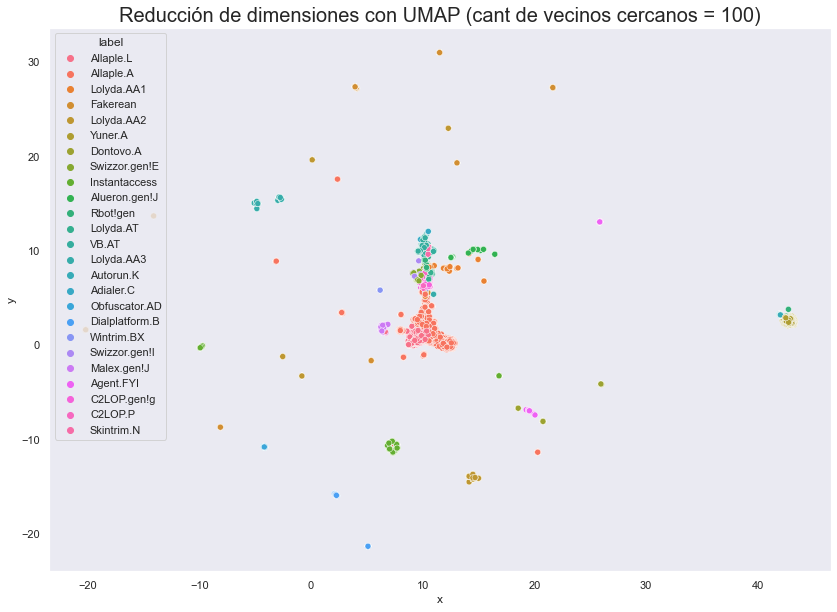

In [27]:
reducer = umap.UMAP(random_state=22, n_components=2, n_neighbors=100)
reducer.fit(scaled_train)
df1 = pd.DataFrame(data={"x" : reducer.embedding_[:, 0], "y" : reducer.embedding_[:, 1], "label":train_labels})
plot = sns.scatterplot(data=df1, x='x',y='y', hue='label')
plot.set_title('Reducción de dimensiones con UMAP (cant de vecinos cercanos = 100)', fontdict={'fontsize':20})